# Support Vector Machine
## By Giriraj Vaishnav

In [1]:
# Numerical computing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read the Iris Dataset file

iris = load_iris()
print(iris)
print(iris.feature_names)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# Divide the dataset into Attributes and Labels

X = iris.data[:, [0, 1]]
y = iris.target

In [4]:
# Split the data set into training data and test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
# Train the decision tree model

SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(x_train, y_train)

SVC(gamma=0.1, random_state=0)

In [6]:
# Predicting the Test Data

predictions = SVM.predict(x_test)
print("Prediction of Test Data:\n",predictions)

Prediction of Test Data:
 [1 2 1 0 1 0 1 0 0 1 1 2 2 2 0 1 2 1 2 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 2 1
 0 1 0 1 2 0 0 1]


Text(0.5, 1.0, 'Support Vector Machine on Iris Dataset')

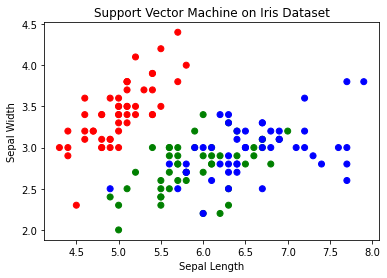

In [7]:
# Visualising the graph 

import matplotlib

colors = ['red','green','blue']

plt.scatter(X[:,0],X[:,1], c = y,cmap = matplotlib.colors.ListedColormap(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Support Vector Machine on Iris Dataset')

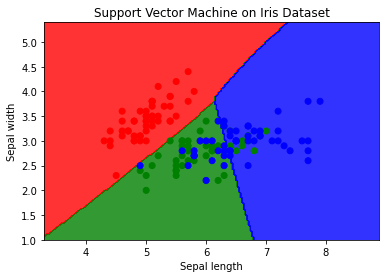

In [8]:
# Plotting the Decision Boundary / Hyperplane

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = SVM.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)  
plt.contourf(xx, yy, Z, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Machine on Iris Dataset')
plt.show()

In [9]:
# Evaluate the Model

print("\nScore : ",SVM.score(x_test, y_test))


Score :  0.8444444444444444


In [10]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, predictions))


Confusion Matrix : 
 [[15  0  0]
 [ 0 15  0]
 [ 0  7  8]]


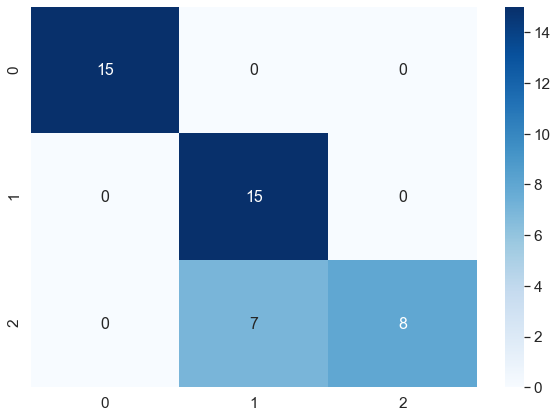

In [11]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, predictions)

df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues') # font size

plt.show()

In [12]:
# Print Classification Report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.68      1.00      0.81        15
           2       1.00      0.53      0.70        15

    accuracy                           0.84        45
   macro avg       0.89      0.84      0.84        45
weighted avg       0.89      0.84      0.84        45

